In [1]:
#Para instalar as libs necessarias descomente as linhas
# install.packages('car')
# install.packages('corrplot')
# install.packages('readxl')
# install.packages('ggplot2')
# install.packages('gridExtra')

#Carregando libs
library(car)
library(corrplot)
library(readxl)
library(ggplot2)
library(gridExtra)

corrplot 0.84 loaded


In [2]:
#Leitura da base de dados
base6 <- read_excel("base6.xls",sheet=2)

#Mostrando dataset e numero de observações
n = nrow(base6)
n

#Tipo das variaveis
str(base6)

attach(base6)

#Nome das colunas
names(base6)

[1] 500

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	500 obs. of  9 variables:
 $ Cliente      : num  1 2 3 4 5 6 7 8 9 10 ...
 $ Duracao      : num  500 730 730 340 730 408 730 272 432 119 ...
 $ censura      : num  0 1 1 0 1 0 1 0 0 0 ...
 $ valorGasto   : num  89.6 49.9 40.7 85.8 31.9 ...
 $ indB2B       : num  1 0 0 0 0 1 0 1 1 0 ...
 $ receita      : num  30.2 39.8 54.9 45.8 69 ...
 $ nEmpregados  : num  1240 166 1016 122 313 ...
 $ TotalProdutos: num  6 6 2 2 1 3 6 3 2 4 ...
 $ TotalFreq    : num  16 10 14 15 9 12 20 19 17 14 ...


[1] "Cliente"       "Duracao"       "censura"       "valorGasto"   
[5] "indB2B"        "receita"       "nEmpregados"   "TotalProdutos"
[9] "TotalFreq"

    Cliente         Duracao         censura        valorGasto     
 Min.   :  1.0   Min.   : 36.0   Min.   :0.000   Min.   :  0.020  
 1st Qu.:125.8   1st Qu.:564.8   1st Qu.:0.000   1st Qu.:  9.953  
 Median :250.5   Median :730.0   Median :1.000   Median : 26.090  
 Mean   :250.5   Mean   :624.5   Mean   :0.536   Mean   : 36.459  
 3rd Qu.:375.2   3rd Qu.:730.0   3rd Qu.:1.000   3rd Qu.: 57.877  
 Max.   :500.0   Max.   :730.0   Max.   :1.000   Max.   :145.160  
     indB2B        receita       nEmpregados     TotalProdutos  
 Min.   :0.00   Min.   : 1.86   Min.   :   4.0   Min.   :1.000  
 1st Qu.:0.00   1st Qu.:28.01   1st Qu.: 270.0   1st Qu.:2.000  
 Median :1.00   Median :40.09   Median : 588.5   Median :3.000  
 Mean   :0.61   Mean   :39.81   Mean   : 668.5   Mean   :3.424  
 3rd Qu.:1.00   3rd Qu.:51.96   3rd Qu.:1025.5   3rd Qu.:5.000  
 Max.   :1.00   Max.   :76.77   Max.   :1968.0   Max.   :6.000  
   TotalFreq    
 Min.   : 1.00  
 1st Qu.: 6.00  
 Median :12.00  
 Mean   

[1] 0

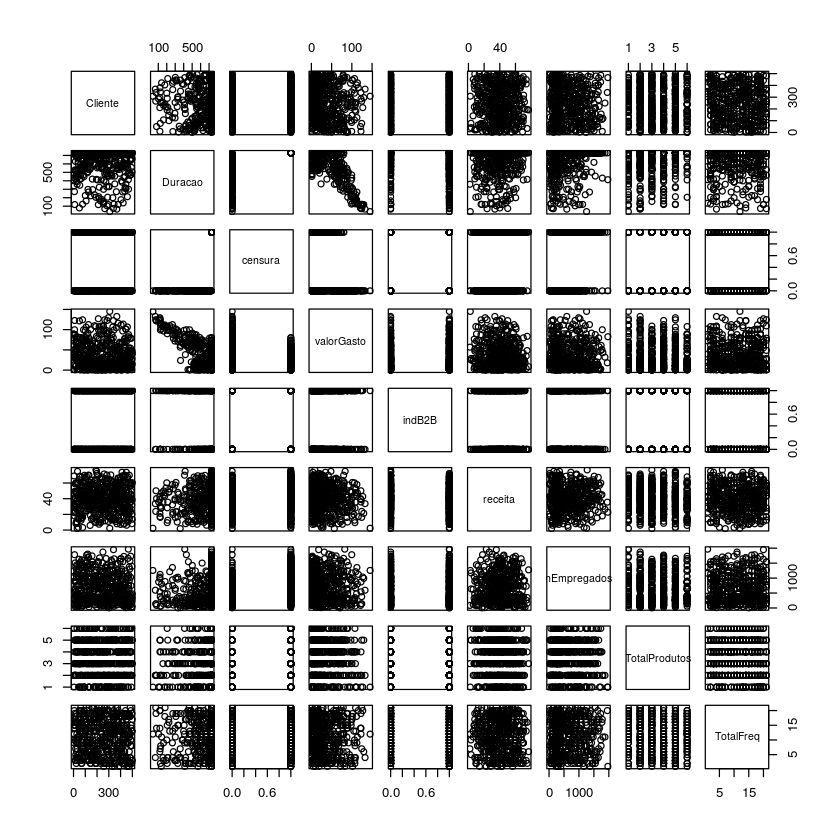

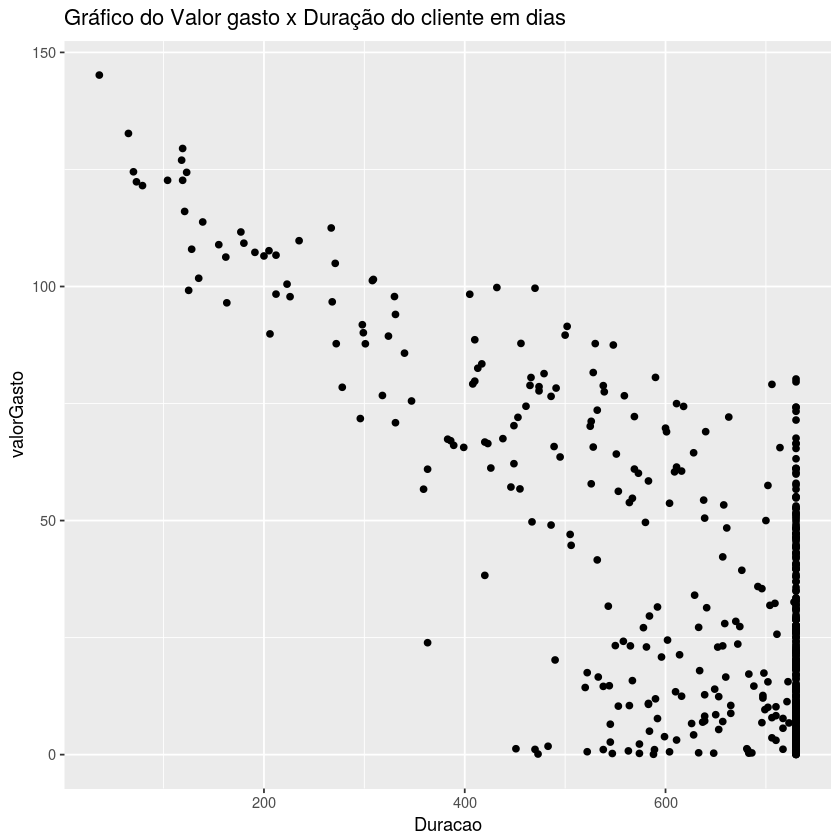

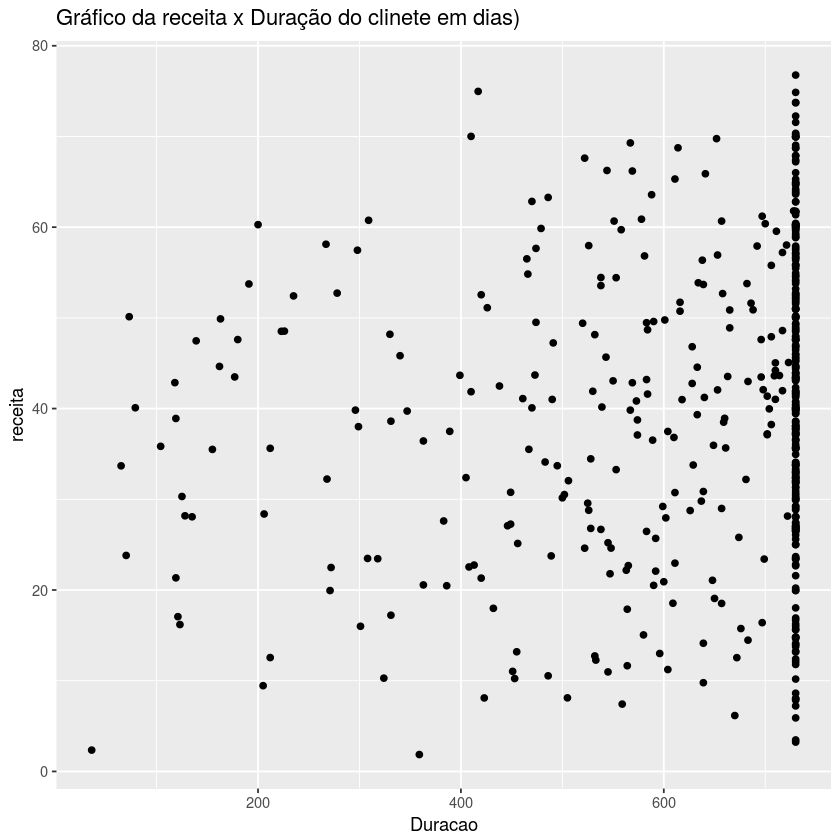

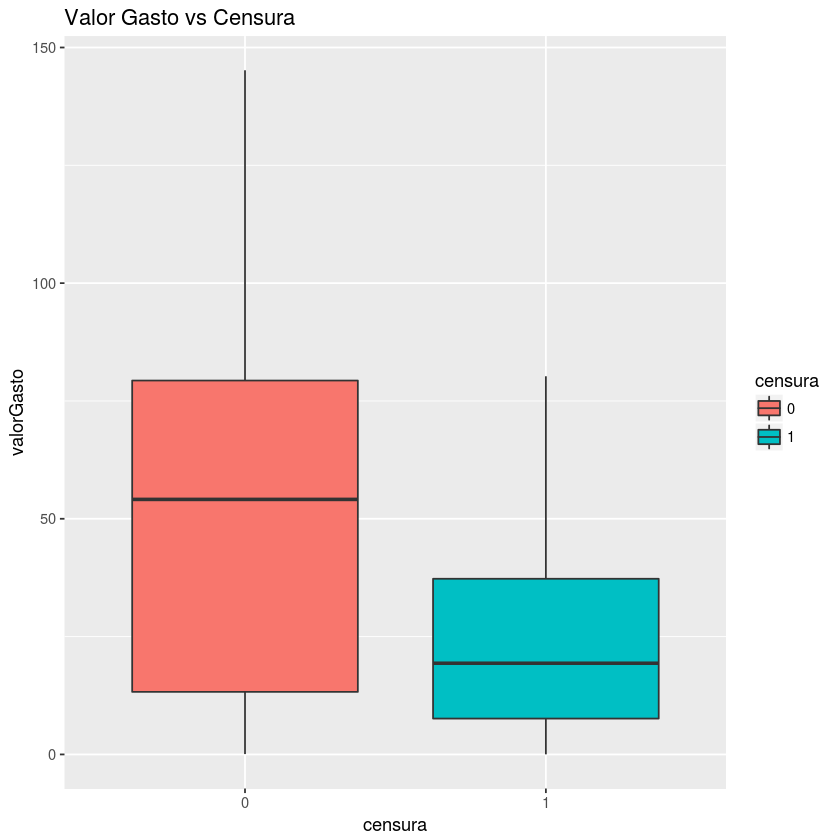

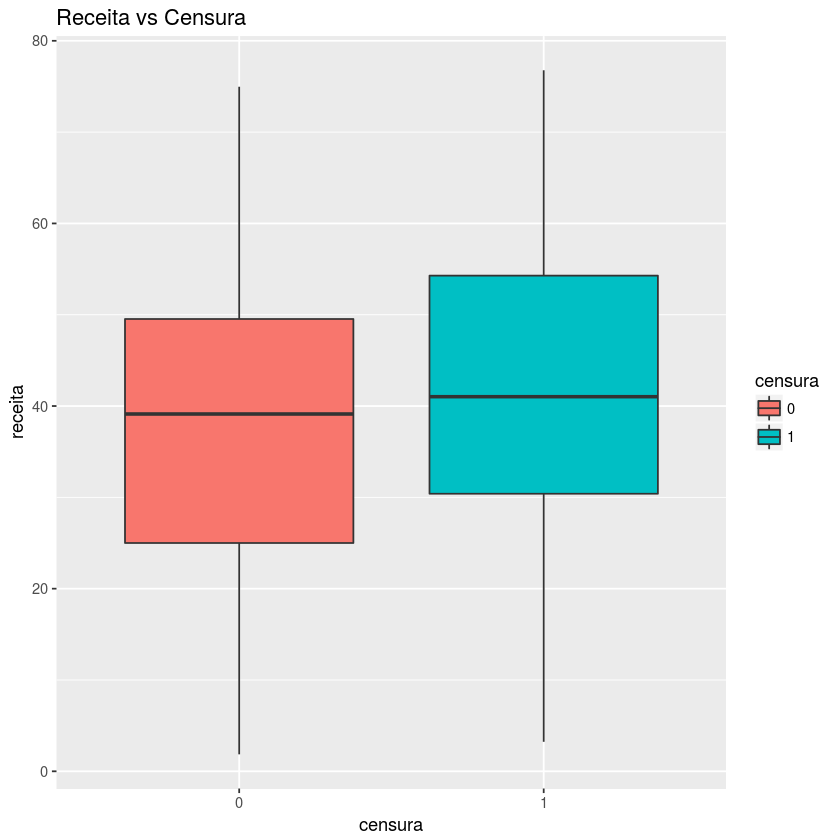

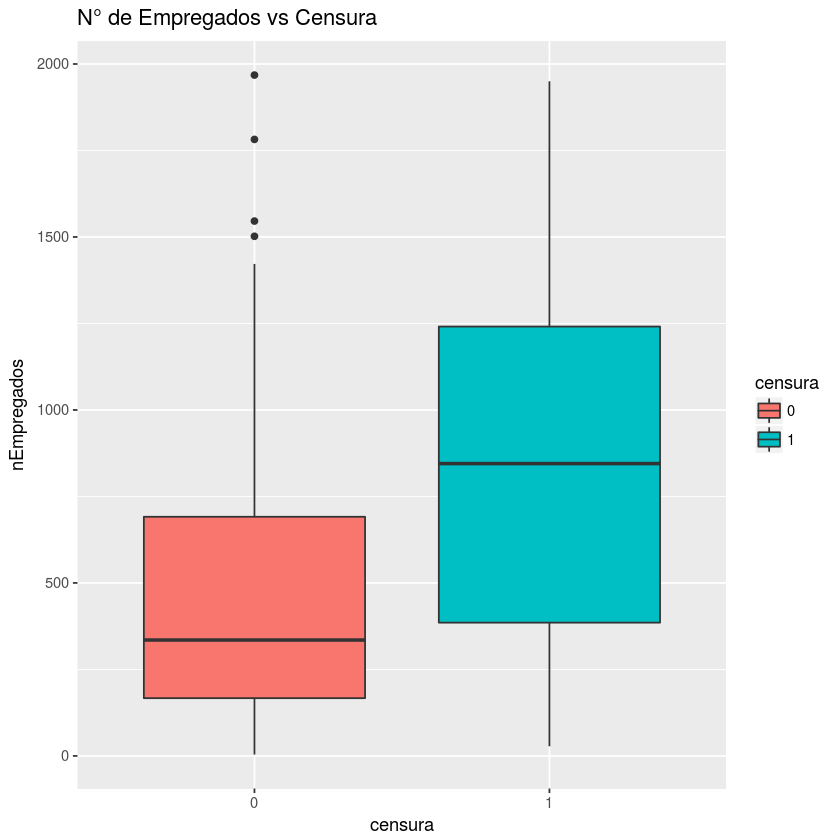

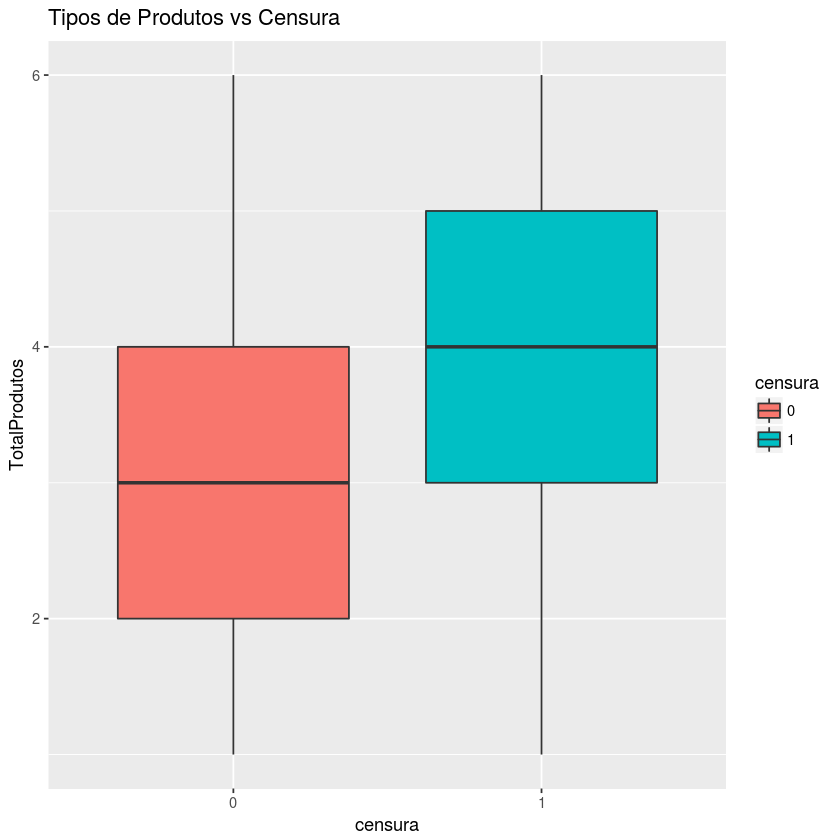

[1] 268

[1] 232

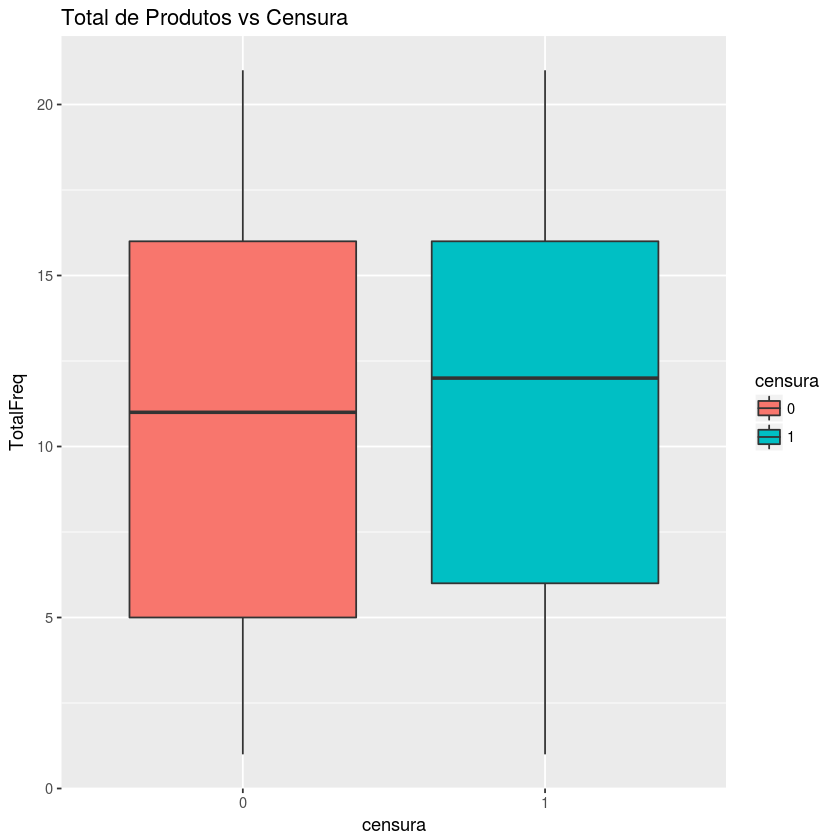

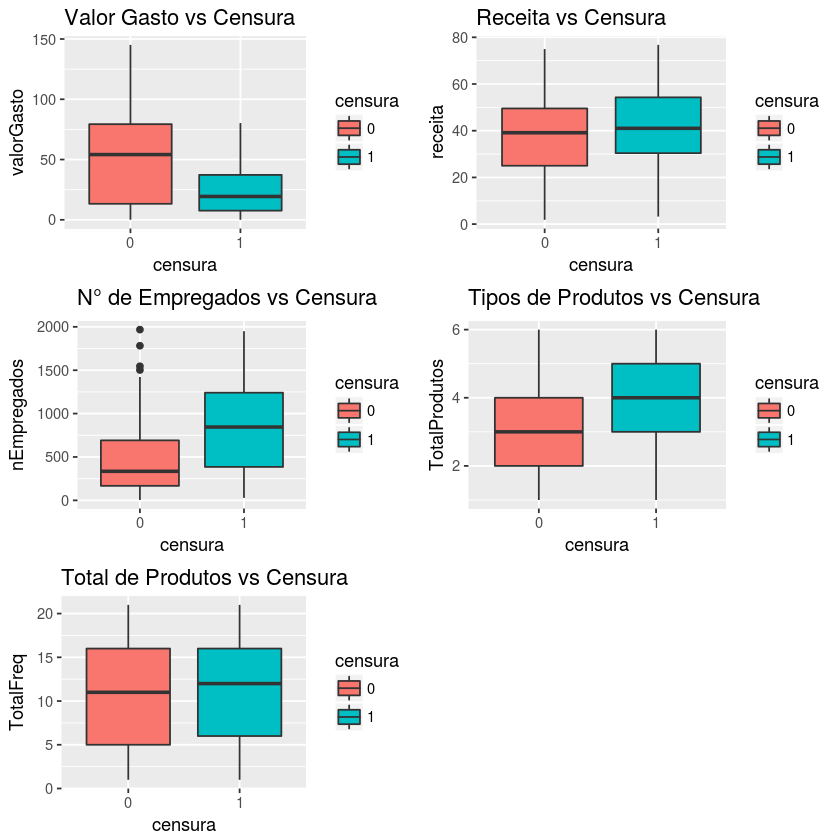

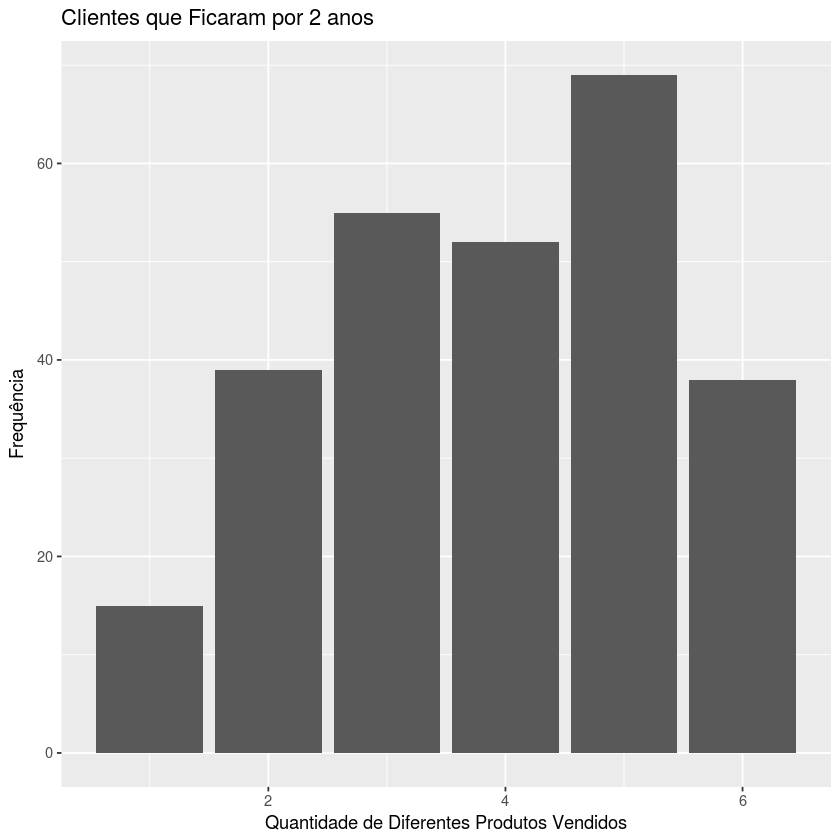

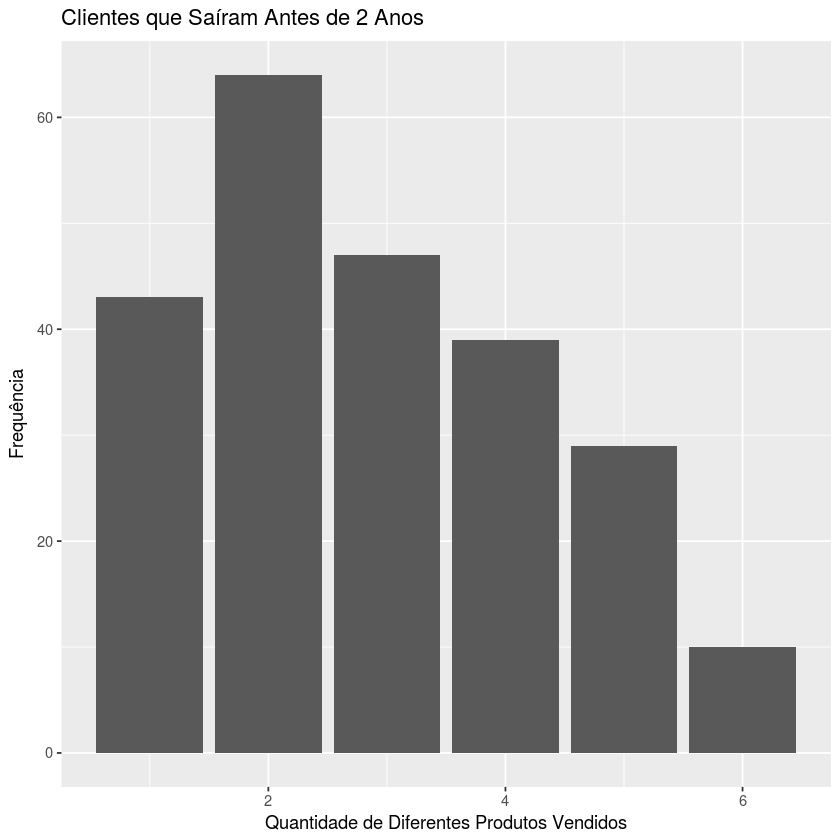

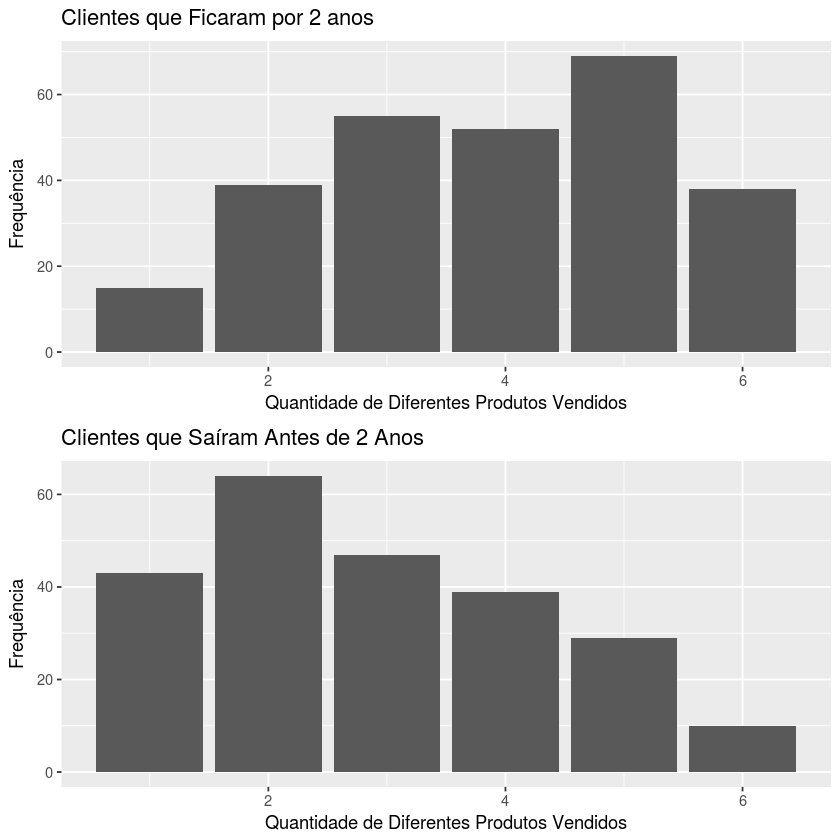

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


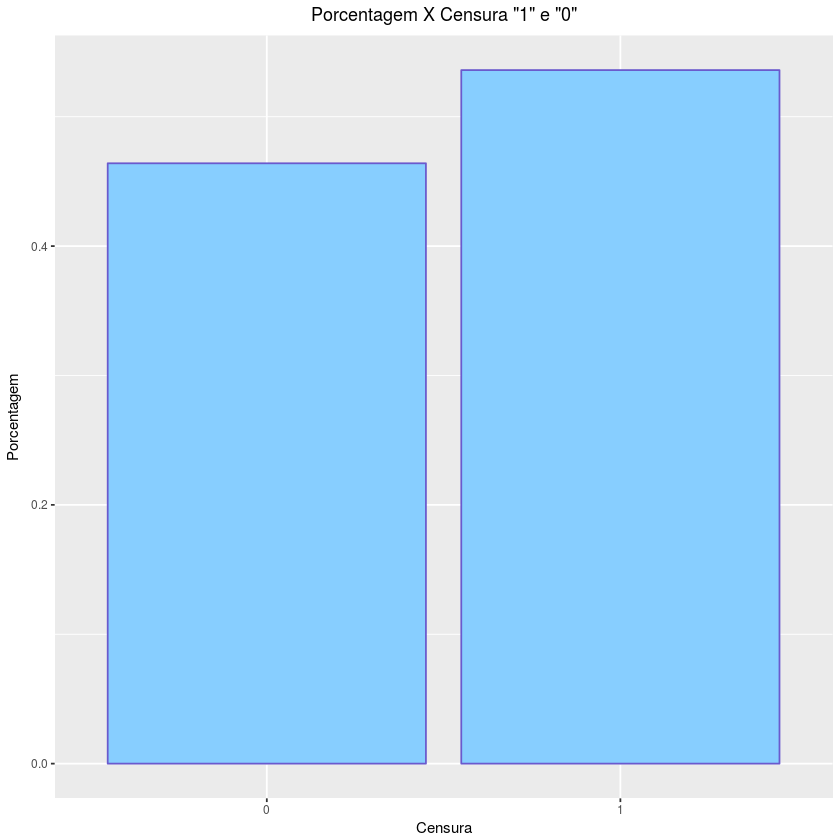

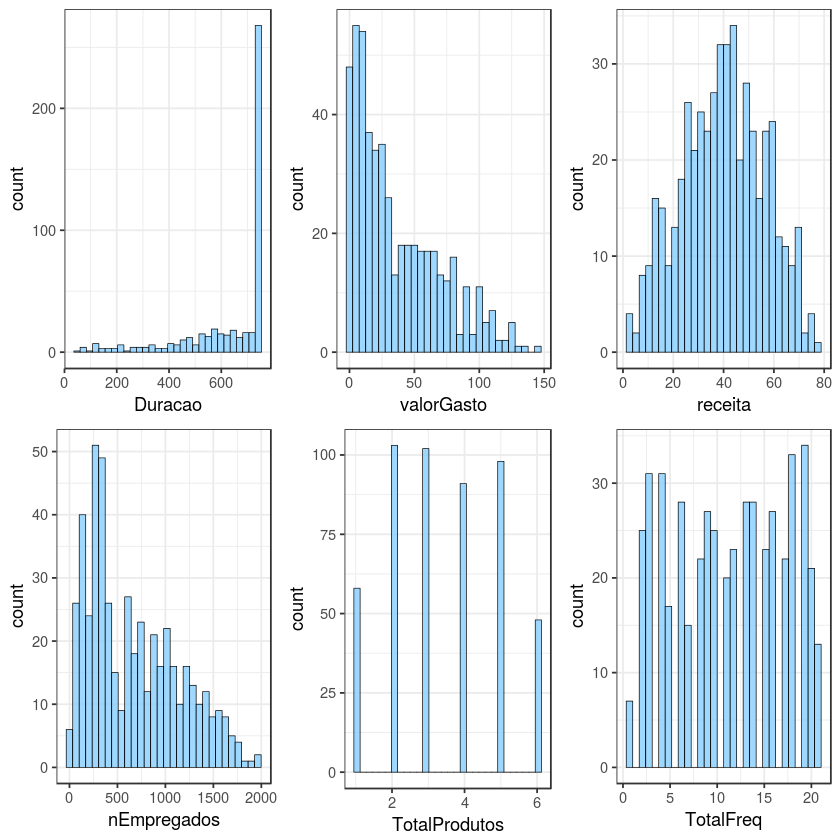

       indB2B
censura         0         1
      0 0.3948718 0.5081967
      1 0.6051282 0.4918033

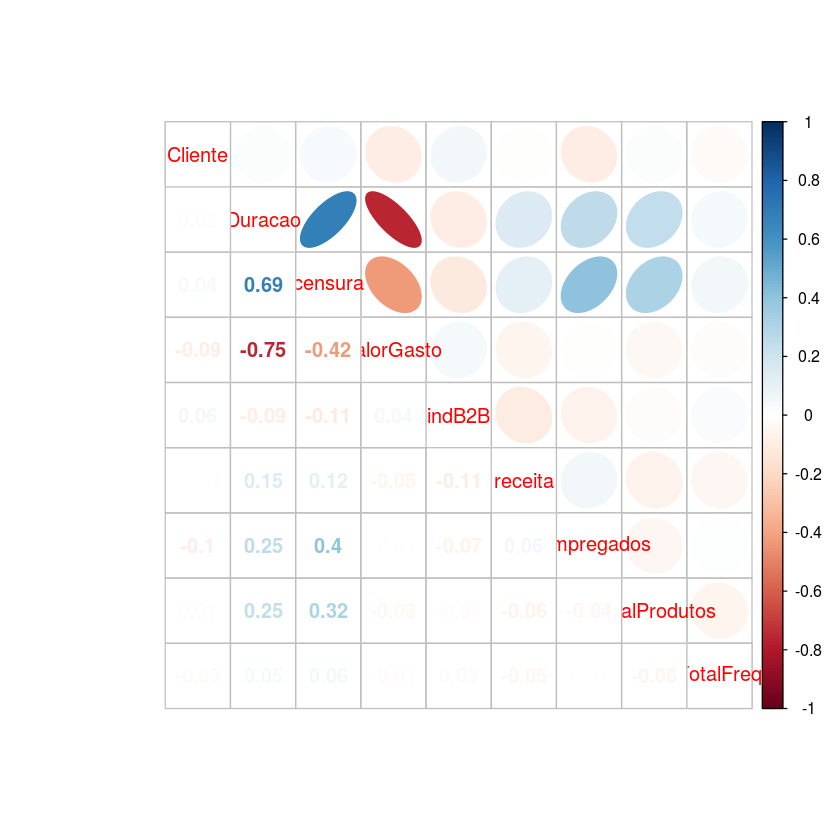

In [3]:
#ANALISE DESCRITIVA
summary(base6)
plot(base6)

#Verificando se há valores faltantes
sum(is.na(as.data.frame(base6)))

#Boxplot's de algumas variaveis
g1=ggplot(base6, aes(x = Duracao, y = valorGasto)) +
  geom_point() +ggtitle("Gráfico do Valor gasto x Duração do cliente em dias")
g1 

g2=ggplot(base6, aes(x = Duracao, y = receita)) +
  geom_point() +ggtitle("Gráfico da receita x Duração do clinete em dias)")
g2

base6$censura <- as.factor(base6$censura)
g3=ggplot(base6, aes(x = censura, y = valorGasto,group=censura,fill=censura)) +
  geom_boxplot() +ggtitle("Valor Gasto vs Censura")
g3
g4=ggplot(base6, aes(x = censura, y = receita,group=censura,fill=censura)) +
  geom_boxplot() +ggtitle("Receita vs Censura")
g4
g5=ggplot(base6, aes(x = censura, y = nEmpregados,group=censura,fill=censura)) +
  geom_boxplot() +ggtitle("N° de Empregados vs Censura")
g5
g6=ggplot(base6, aes(x = censura, y = TotalProdutos,group=censura,fill=censura)) +
  geom_boxplot() +ggtitle("Tipos de Produtos vs Censura")
g6
g7=ggplot(base6, aes(x = censura, y = TotalFreq,group=censura,fill=censura)) +
  geom_boxplot() +ggtitle("Total de Produtos vs Censura")
g7

#Verificando balanceamento
clientes1=subset(base6,censura==1)
nrow(clientes1)
clientes0=subset(base6, censura==0)
nrow(clientes0)

#Rearranjando boxplot's
grid.arrange(g3,g4,g5,g6,g7,ncol=2, nrow = 3)

g8=ggplot(data=clientes1, aes(x=TotalProdutos)) +
  geom_bar()+
  xlab("Quantidade de Diferentes Produtos Vendidos")+
  ylab("Frequência")+
  ggtitle("Clientes que Ficaram por 2 anos")
g8

g9=ggplot(data=clientes0, aes(x=TotalProdutos)) +
  geom_bar() +
  xlab("Quantidade de Diferentes Produtos Vendidos")+
  ylab("Frequência")+
  ggtitle("Clientes que Saíram Antes de 2 Anos")
g9
grid.arrange(g8,g9,ncol=1, nrow = 2)

#Verificando balanceamento por porcentagem no visual gráfico
g10=ggplot(data=base6, aes(x=censura)) +
    geom_bar(color="slateblue", fill="skyblue1", aes(y = (..count..)/sum(..count..))) + 
    xlab("Censura") + 
    ylab("Porcentagem") +
    ggtitle("Porcentagem X Censura \"1\" e \"0\"") +
    theme_gray(base_size = 9) +
    theme(plot.title =  element_text(hjust = 0.5))
g10


base6$censura = as.factor(base6$censura)
base6$indB2B = as.integer(base6$indB2B)

#Histograma das variaveis
g1=ggplot(data=base6,aes(x=Duracao))+
  geom_histogram(fill="skyblue1",color="black",size=0.2, alpha=0.8)+theme_bw()
g2=ggplot(data=base6,aes(x=valorGasto))+
  geom_histogram(fill="skyblue1",color="black" , size=0.2,alpha=0.8)+theme_bw()
g3=ggplot(data=base6,aes(x=receita))+
  geom_histogram(fill="skyblue1",color="black" ,size=0.2 ,alpha=0.8)+theme_bw()
g4=ggplot(data=base6,aes(x=nEmpregados))+
  geom_histogram(fill="skyblue1",color="black" ,size=0.2 , alpha=0.8)+theme_bw()
g5=ggplot(data=base6,aes(x=TotalProdutos))+
  geom_histogram(fill="skyblue1",color="black" ,size=0.2 , alpha=0.8)+theme_bw()
g6=ggplot(data=base6,aes(x=TotalFreq))+
  geom_histogram(fill="skyblue1",color="black" ,size=0.2 , alpha=0.8)+theme_bw()
grid.arrange(g1, g2, g3, g4, g5, g6, nrow=2, ncol=3)

#Correlacao
par(mfrow = c(1,1))
base6$censura <- as.numeric(base6$censura)
correlacao <- cor(base6)
corrplot.mixed(correlacao, upper = "ellipse")

b2b=table(censura, indB2B)
b2b=prop.table(b2b,margin=2)
b2b